In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Series, DataFrame
from scipy import stats
import os

In [2]:
df=pd.read_csv(r"D:\ishan\Machine Learning DOC\Churn_Modelling.csv")

In [3]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Exited'>

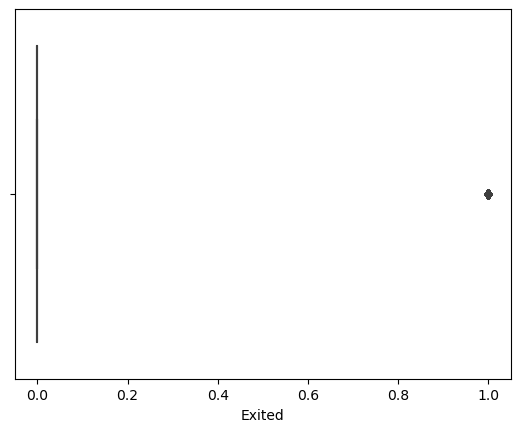

In [7]:
sns.boxplot(df["Exited"])

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [9]:
df.shape

(10000, 14)

In [10]:
df.select_dtypes(include='object').nunique()

Surname      2932
Geography       3
Gender          2
dtype: int64

In [11]:
df.select_dtypes(include='int64').nunique()

RowNumber         10000
CustomerId        10000
CreditScore         460
Age                  70
Tenure               11
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
Exited                2
dtype: int64

In [12]:
df.drop(columns=['Surname','RowNumber','CustomerId'],inplace=True)

In [13]:
df.nunique()

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64

In [14]:
df.duplicated().sum()

0

In [15]:
df.select_dtypes(include='object').nunique()

Geography    3
Gender       2
dtype: int64

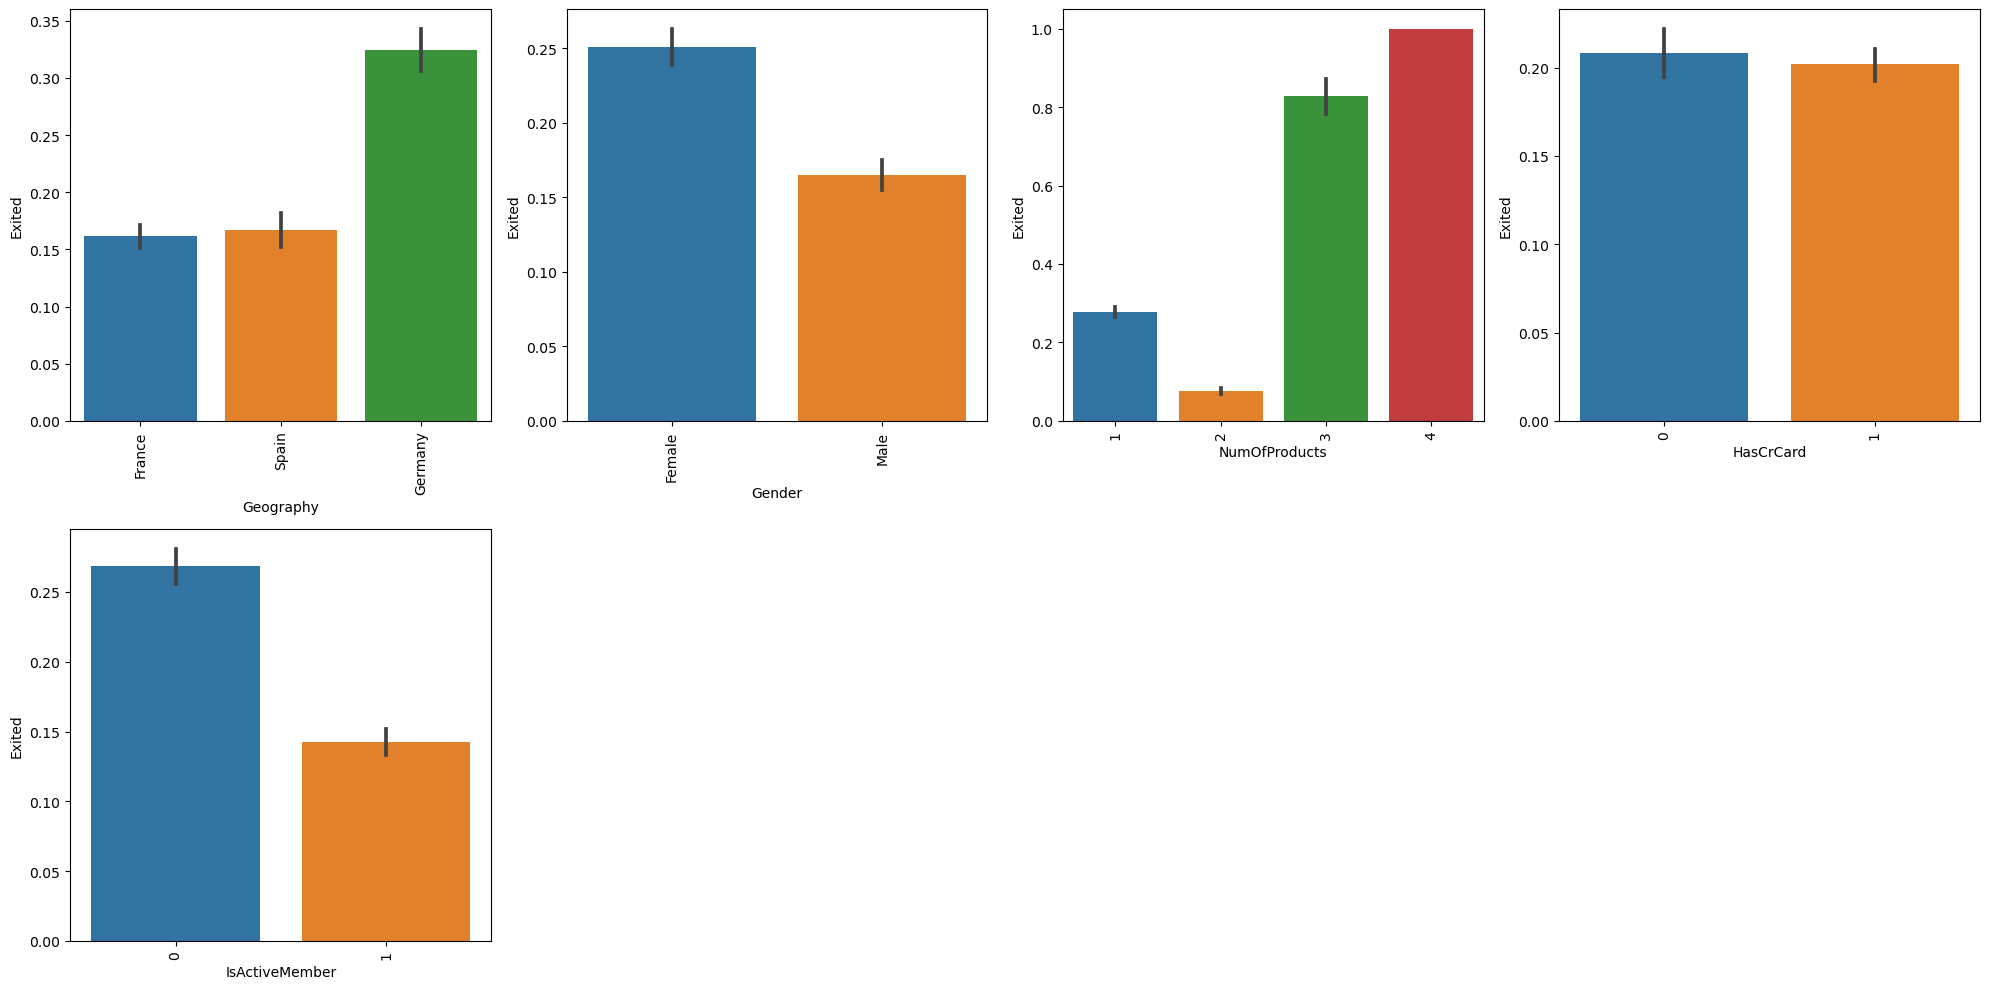

In [16]:
# list of categorical variable to plot
cat_vars=['Geography','Gender','NumOfProducts','HasCrCard','IsActiveMember']
#create figures with subplot
fig, axs=plt.subplots(nrows=2,ncols=4,figsize=(20,10))
axs=axs.flatten()

#create barplot for each categorical variable
for i, var in enumerate (cat_vars):
    sns.barplot(x=var,y='Exited',data=df,ax=axs[i],estimator=np.mean)
    axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)
    
fig.delaxes(axs[5])

fig.delaxes(axs[6])

fig.delaxes(axs[7])


    
#adjusting space between subplots
fig.tight_layout()

plt.show()

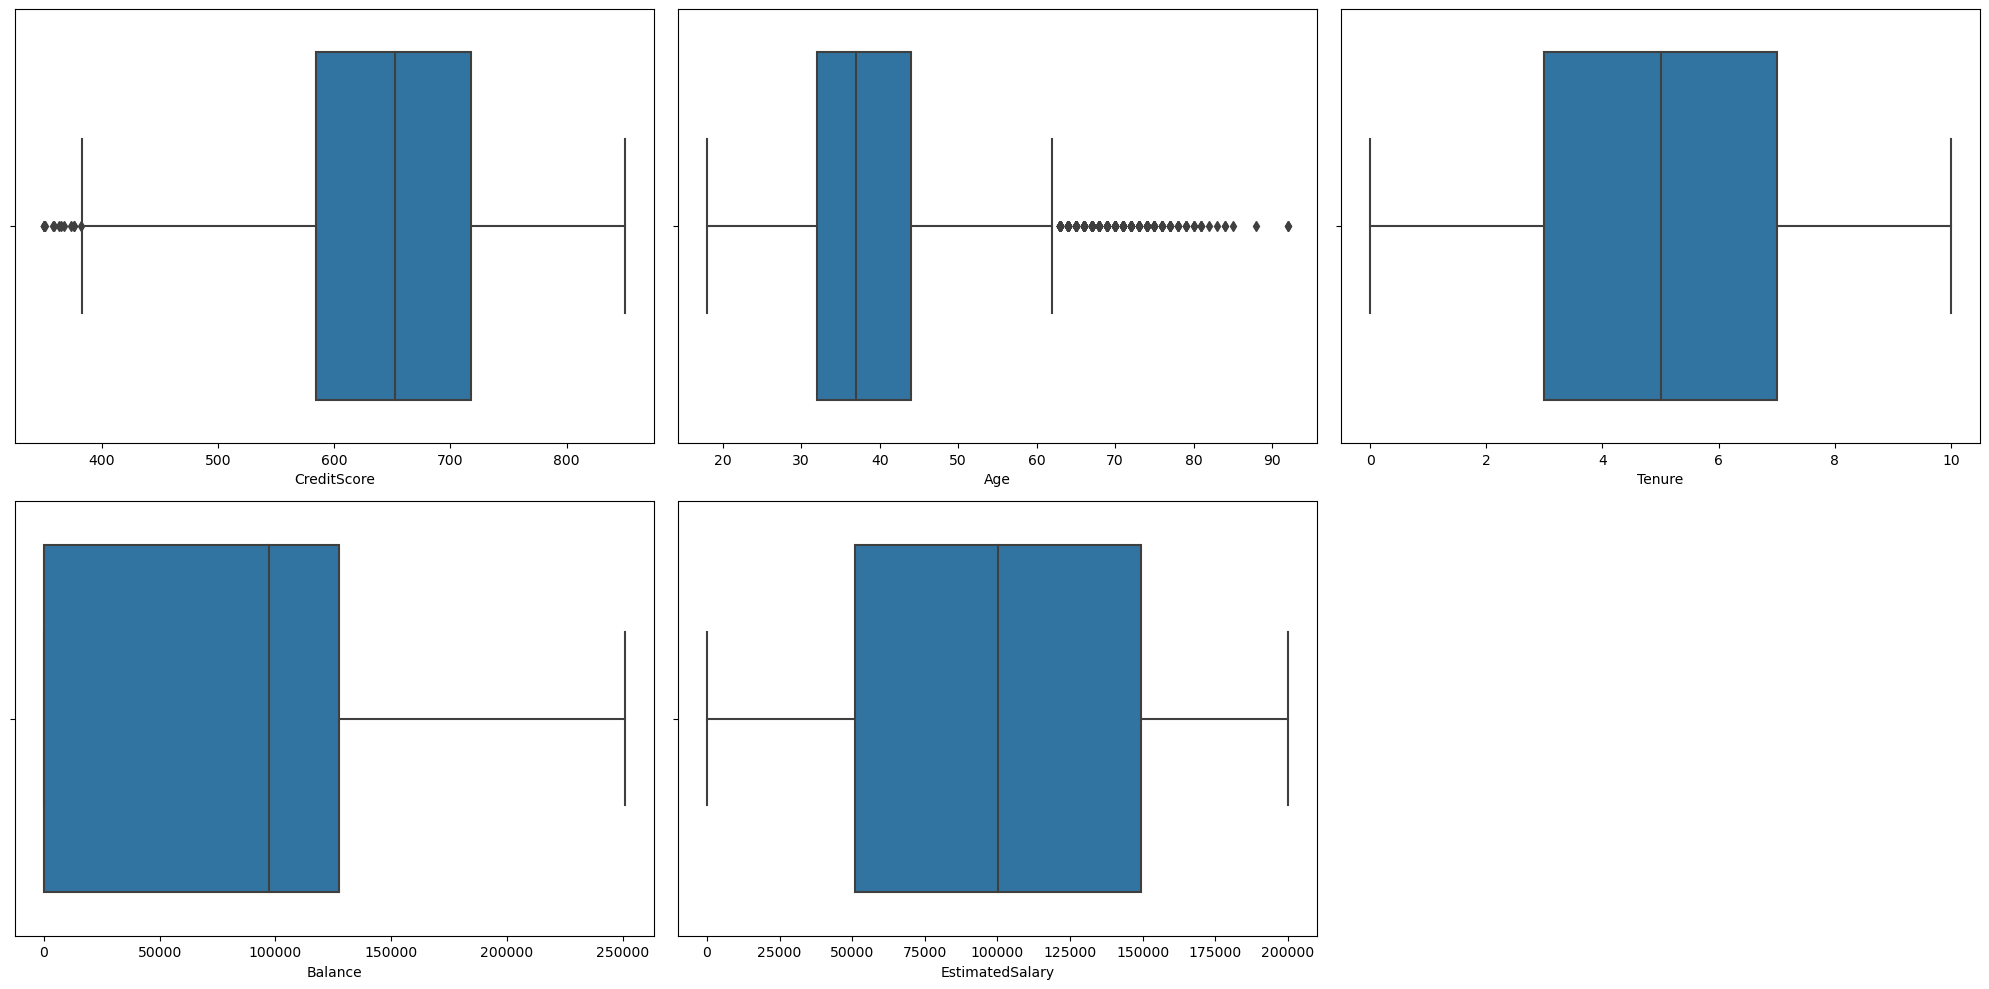

In [17]:
num_var=['CreditScore','Age','Tenure','Balance','EstimatedSalary']

#create figures with subplot
fig, axs=plt.subplots(nrows=2,ncols=3,figsize=(20,10))
axs=axs.flatten()

for i,var in enumerate (num_var):
    sns.boxplot(x=var,data=df,ax=axs[i])
    
    
#remove the 5th subplot
fig.delaxes(axs[5])


fig.tight_layout()
plt.show()

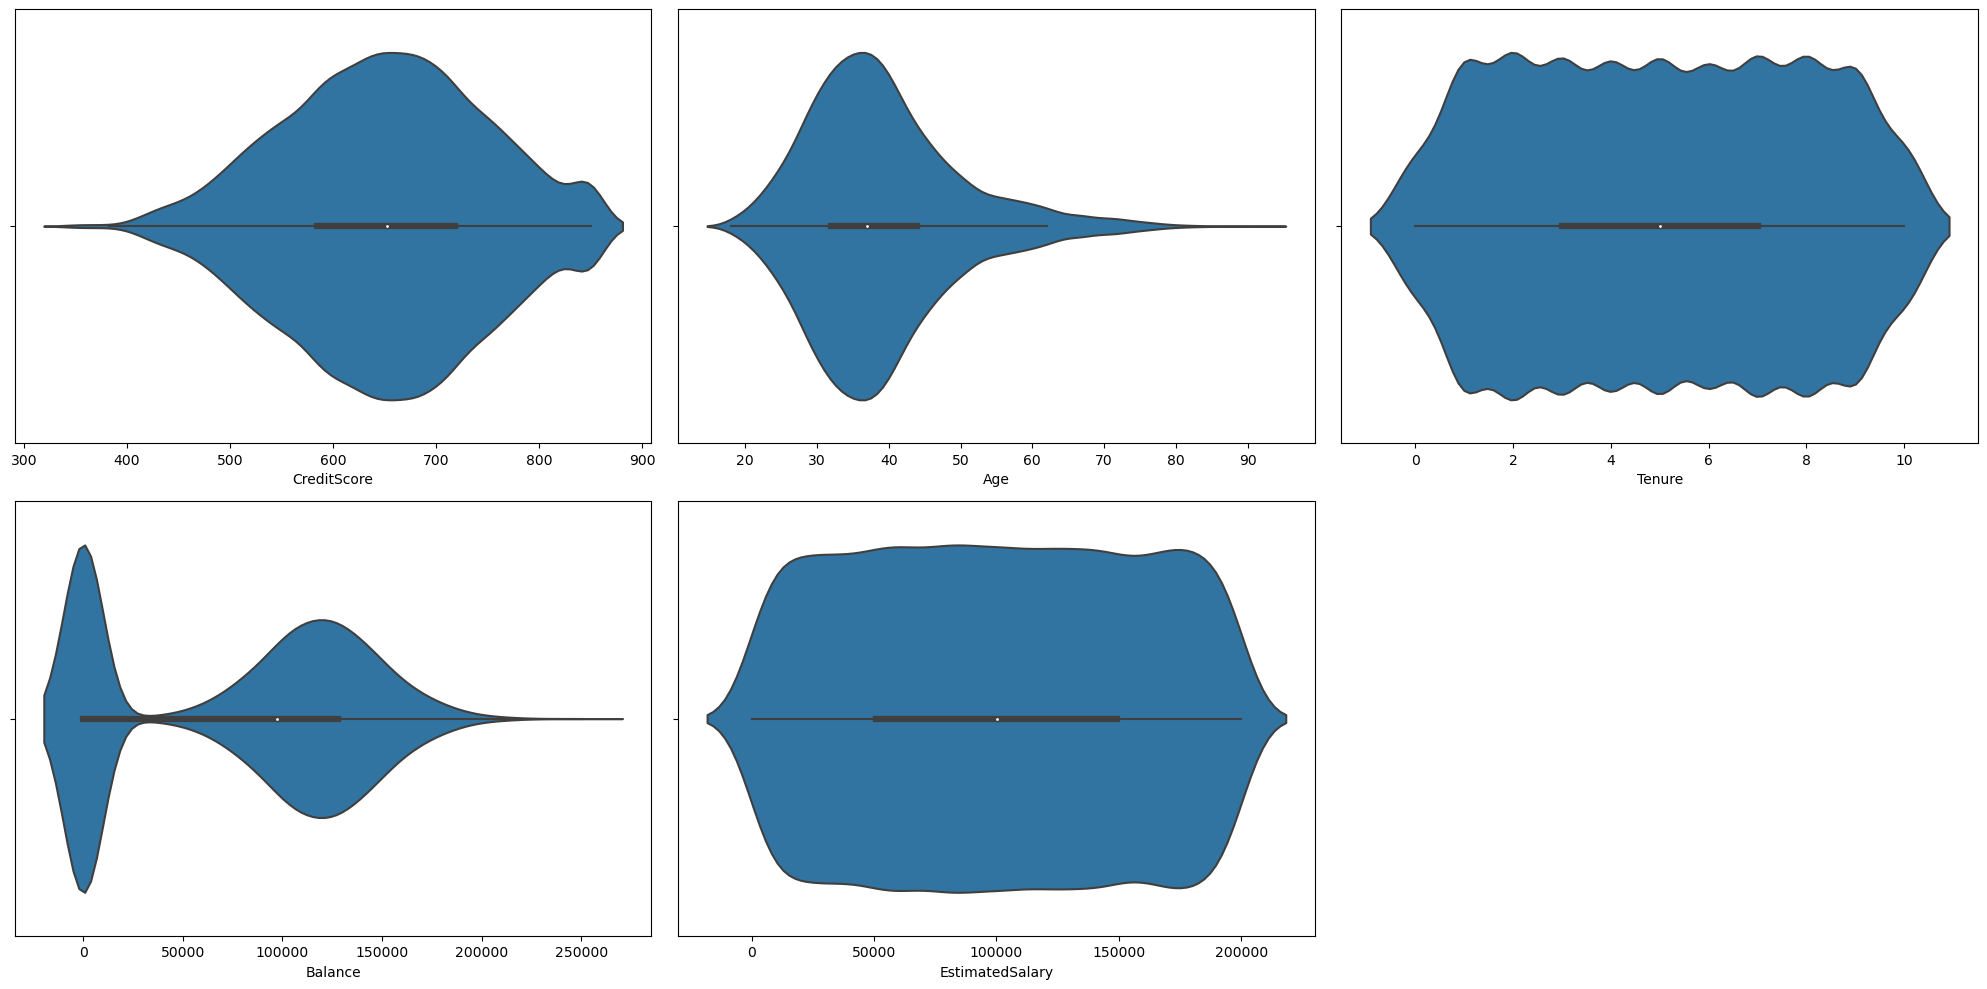

In [18]:
num_var=['CreditScore','Age','Tenure','Balance','EstimatedSalary']

#create figures with subplot
fig, axs=plt.subplots(nrows=2,ncols=3,figsize=(20,10))
axs=axs.flatten()

for i,var in enumerate (num_var):
    sns.violinplot(x=var,data=df,ax=axs[i])
    
    
#remove the 5th subplot
fig.delaxes(axs[5])


fig.tight_layout()
plt.show()

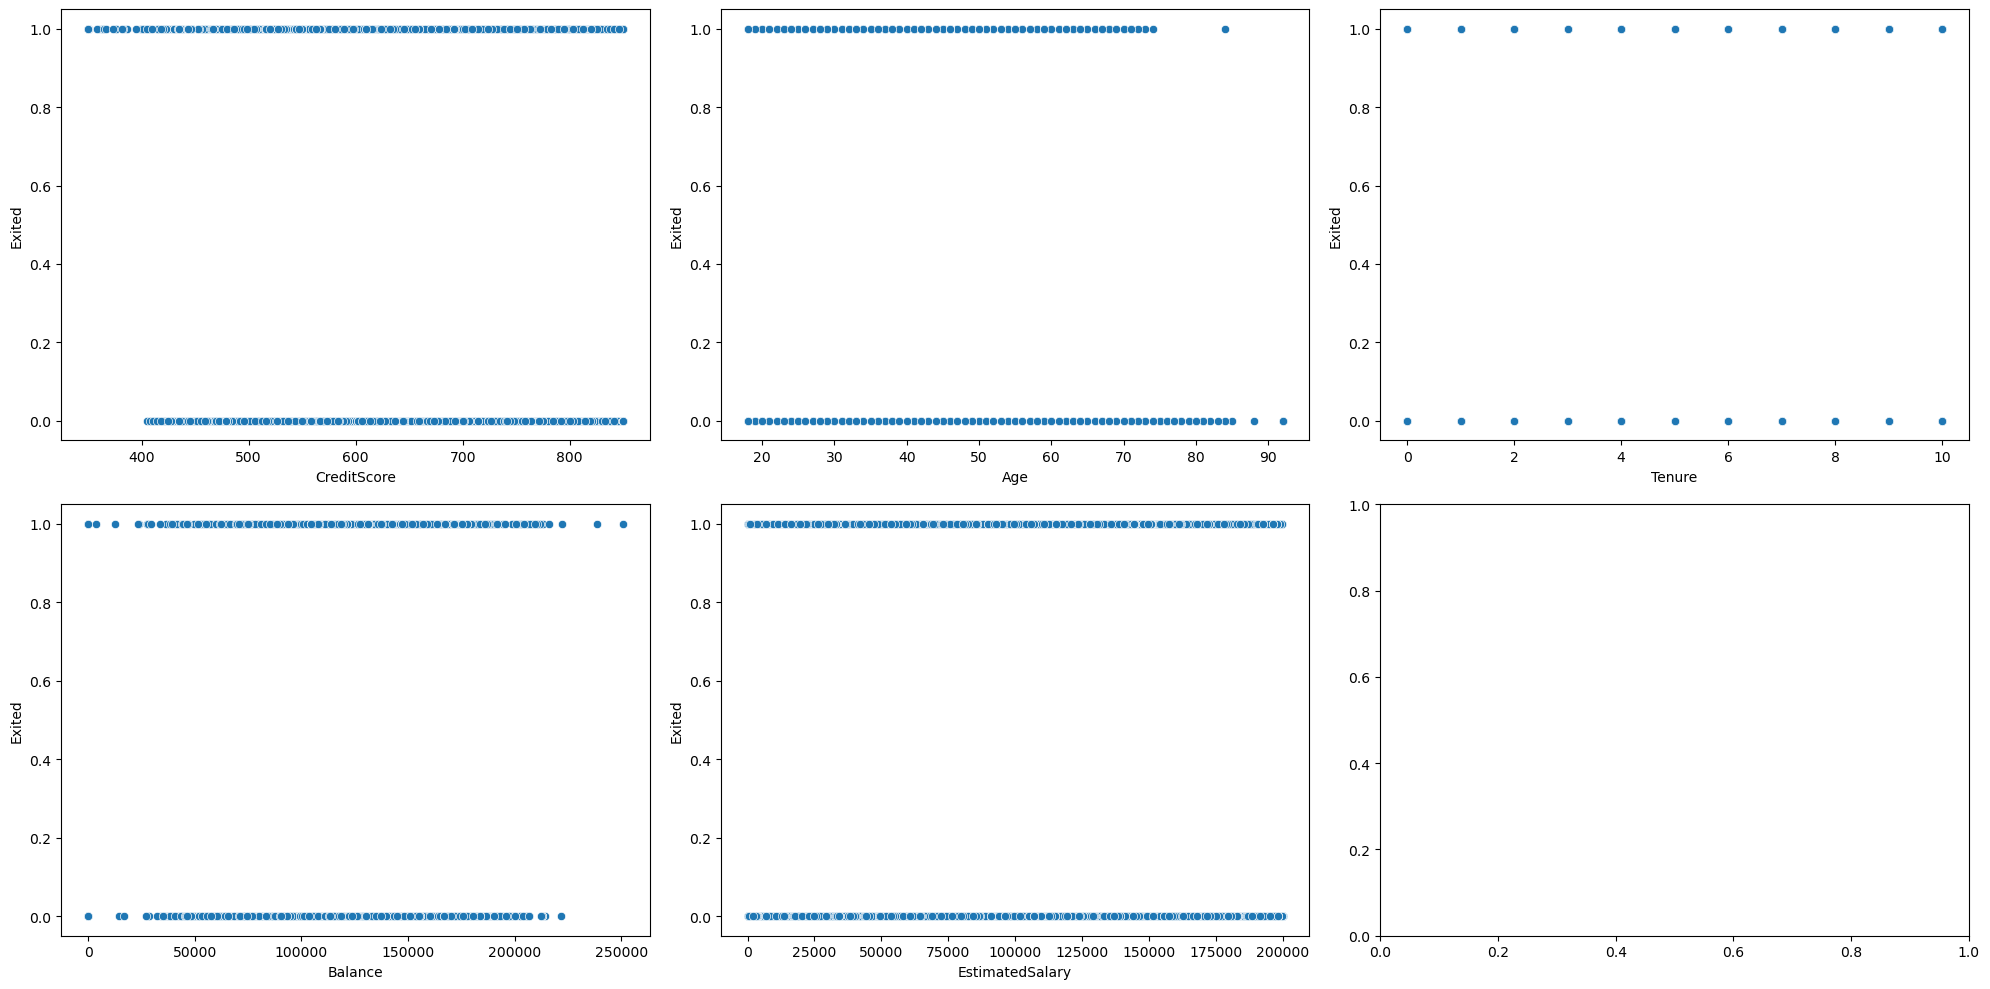

In [19]:
num_var=['CreditScore','Age','Tenure','Balance','EstimatedSalary']

#create figures with subplot
fig, axs=plt.subplots(nrows=2,ncols=3,figsize=(20,10))
axs=axs.flatten()

for i,var in enumerate (num_var):
    sns.scatterplot(x=var,y='Exited',data=df,ax=axs[i])
    

    
fig.tight_layout()
plt.show()

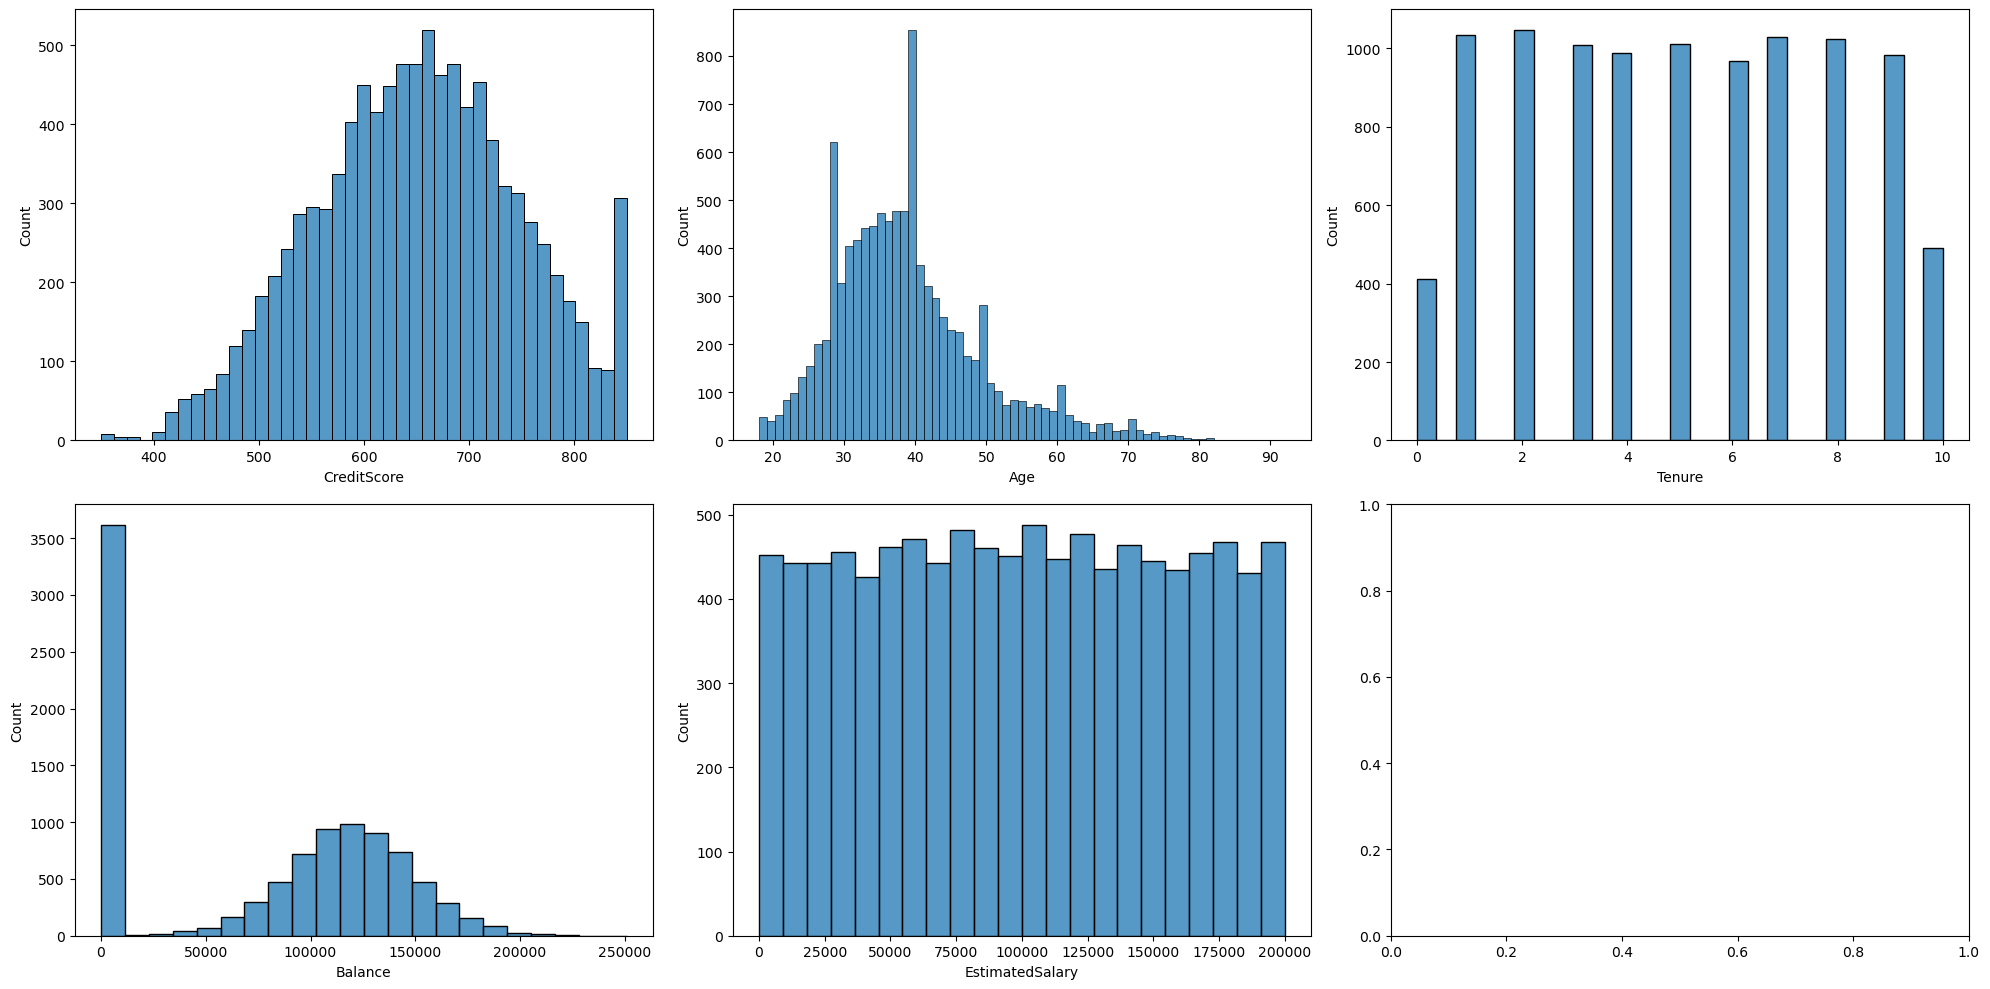

In [20]:
num_var=['CreditScore','Age','Tenure','Balance','EstimatedSalary']

#create figures with subplot
fig, axs=plt.subplots(nrows=2,ncols=3,figsize=(20,10))
axs=axs.flatten()

for i,var in enumerate (num_var):
    sns.histplot(x=var,data=df,ax=axs[i])
    

fig.tight_layout()
plt.show()

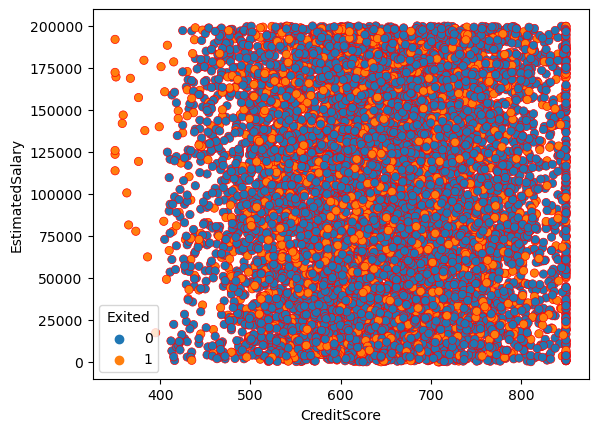

In [21]:
sns.scatterplot(x='CreditScore',y='EstimatedSalary',hue='Exited',data=df,edgecolor='r')
plt.show()

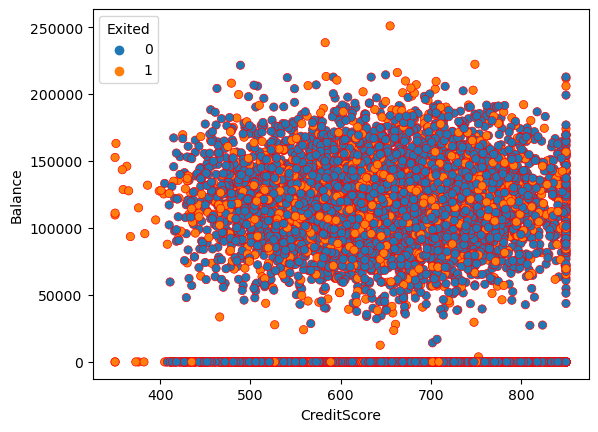

In [22]:
sns.scatterplot(x='CreditScore',y='Balance',hue='Exited',data=df,edgecolor='r')
plt.show()

In [23]:
#Loop over each column in the Dataframe where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:
    
    #print the columns name and the unique values
    print(f"{col}:{df[col].unique()}")

Geography:['France' 'Spain' 'Germany']
Gender:['Female' 'Male']


In [24]:
from sklearn import preprocessing
#loop over each column in the column where dtype is object
for col in df.select_dtypes(include=["object"]).columns:
    
    #Initialize a LabelEncoder object
    label_encoder=preprocessing.LabelEncoder()
    
    #fit the encoder to the unique value in the column 
    label_encoder.fit(df[col].unique())
    
    #transform the column using the encoder 
    df[col]=label_encoder.transform(df[col])
    
    #print the column name and the unique encoder value 
    print(f"(col):{df[col].unique()}")

(col):[0 2 1]
(col):[0 1]


In [25]:
from scipy import stats

#define a function to remove the outlier using z-score for any selected numerical values 

def remove_outliers(df,cols,threshold=3):
    for col in cols:
        #calculate z-score for each data point in selected column
        z=np.abs(stats.zscore(df[col]))
        #remove rows with z-score greater than threshold in selected column
        df=df[(z<threshold) | (df[col].isnull())]
    return df

In [26]:
selected_cols=['Age']
df_clean=remove_outliers(df,selected_cols)
df_clean.shape

(9867, 11)

In [27]:
selected_cols=['CreditScore']
df_clean=remove_outliers(df,selected_cols)
df_clean.shape

(9992, 11)

In [28]:
df.dtypes

CreditScore          int64
Geography            int32
Gender               int32
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

<AxesSubplot:>

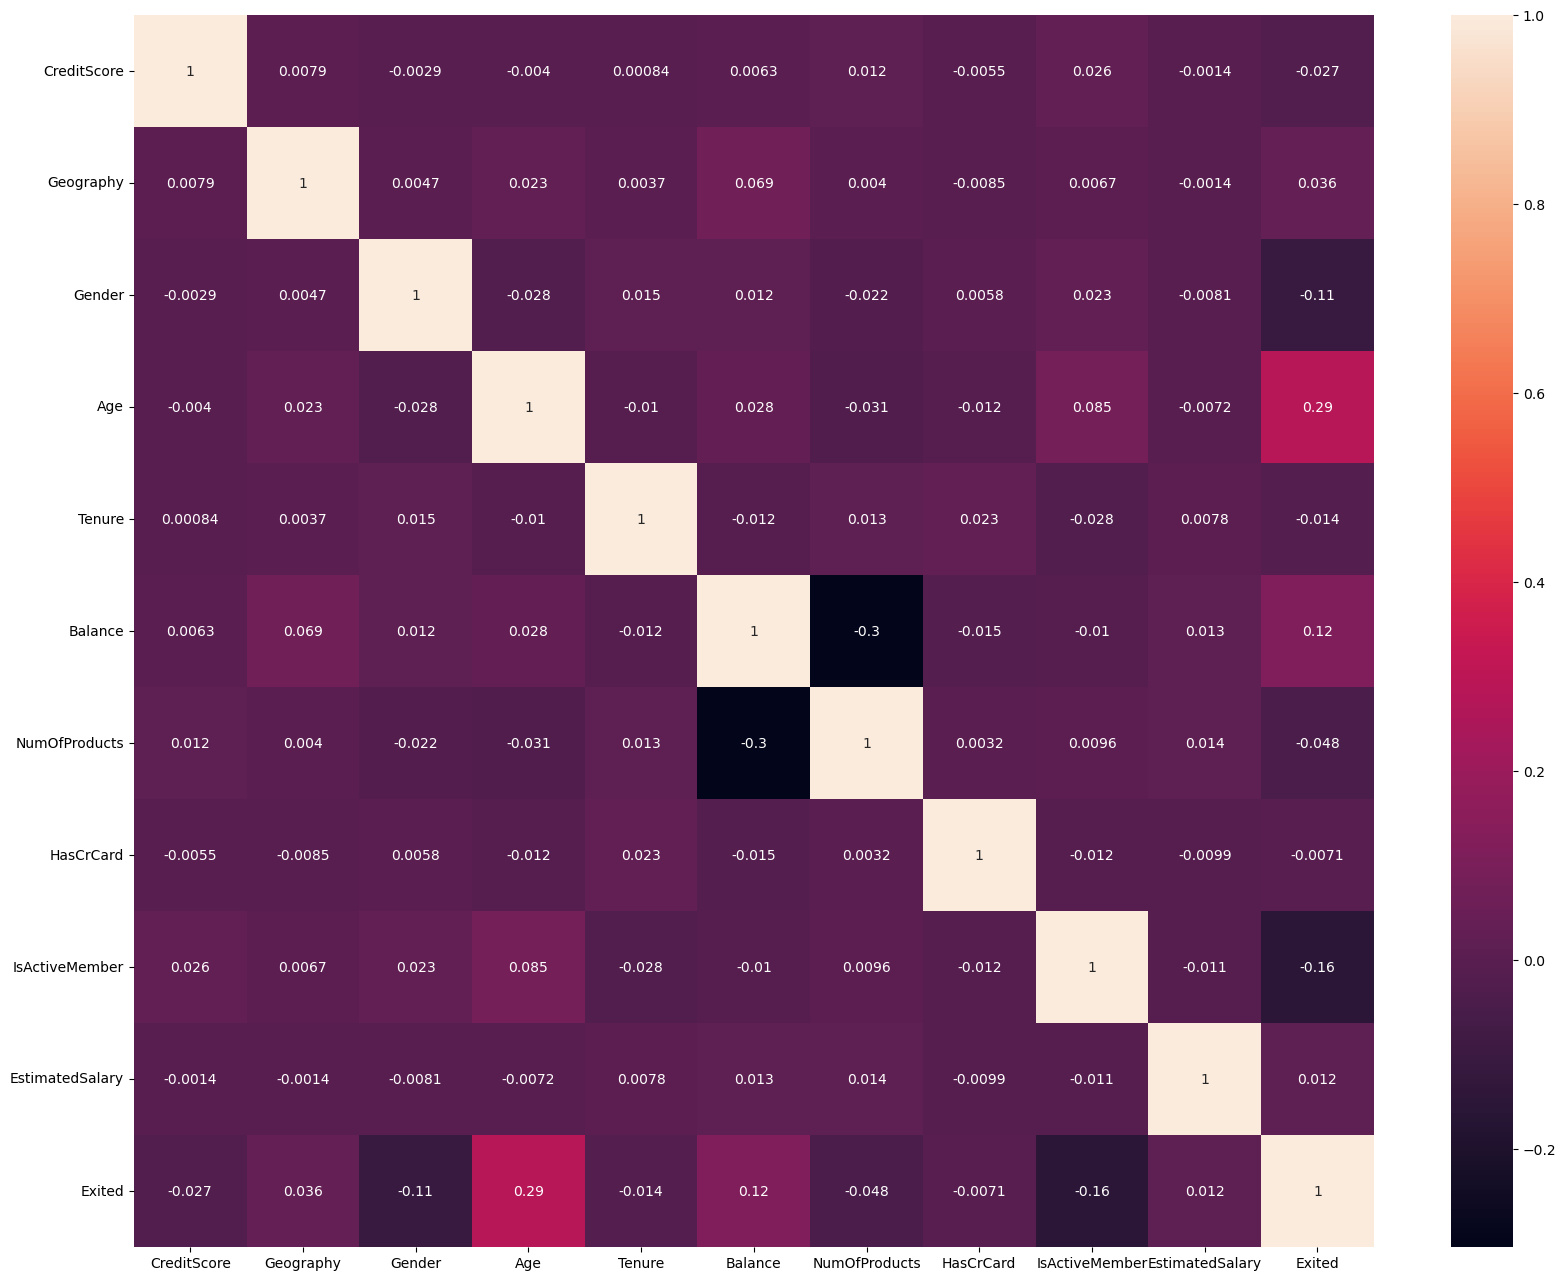

In [29]:
plt.figure(figsize=(20,16))
sns.heatmap(df.corr(),fmt='.2g',annot=True)

In [30]:
x=df.drop('Exited',axis=1)
y=df['Exited']

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [32]:
x_train

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
7389,667,2,0,34,5,0.00,2,1,0,163830.64
9275,427,1,1,42,1,75681.52,1,1,1,57098.00
2995,535,0,0,29,2,112367.34,1,1,0,185630.76
5316,654,2,1,40,5,105683.63,1,1,0,173617.09
356,850,2,0,57,8,126776.30,2,1,1,132298.49
...,...,...,...,...,...,...,...,...,...,...
9225,594,1,0,32,4,120074.97,2,1,1,162961.79
4859,794,2,0,22,4,114440.24,1,1,1,107753.07
3264,738,0,1,35,5,161274.05,2,1,0,181429.87
9845,590,2,0,38,9,0.00,2,1,1,148750.16


In [33]:
y_train

7389    0
9275    0
2995    0
5316    0
356     0
       ..
9225    0
4859    0
3264    0
9845    0
2732    1
Name: Exited, Length: 8000, dtype: int64

In [34]:
x_test

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
9394,597,1,0,35,8,131101.04,1,1,1,192852.67
898,523,0,0,40,2,102967.41,1,1,0,128702.10
2398,706,2,0,42,8,95386.82,1,1,1,75732.25
5906,788,0,1,32,4,112079.58,1,0,0,89368.59
2343,706,1,1,38,5,163034.82,2,1,1,135662.17
...,...,...,...,...,...,...,...,...,...,...
1037,625,0,0,24,1,0.00,2,1,1,180969.55
2899,586,0,0,35,7,0.00,2,1,0,70760.69
9549,578,2,1,36,1,157267.95,2,1,0,141533.19
2740,650,1,1,34,4,142393.11,1,1,1,11276.48


In [35]:
y_test

9394    0
898     1
2398    0
5906    0
2343    0
       ..
1037    0
2899    0
9549    0
2740    0
6690    0
Name: Exited, Length: 2000, dtype: int64

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  int32  
 2   Gender           10000 non-null  int32  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int32(2), int64(7)
memory usage: 781.4 KB


In [37]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((8000, 10), (2000, 10), (8000,), (2000,))

In [59]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_boston

#create a decisiontreeClassifier object
dtree=DecisionTreeClassifier()

#define the hyperparameter to tune and thier values
param_grid={
    'max_depth':[3,4,5,6,7,8],
    'min_samples_split':[2,3,4],
    'min_samples_leaf':[1,2,3,4],
    'random_state':[0,7,42]
}

#create a gridsearchcv object
grid_search=GridSearchCV(dtree,param_grid,cv=5,scoring='neg_mean_squared_error')

#fit the gridsearchcv object to the data
grid_search.fit(x_train,y_train)

#print the best hyperparameter
print(grid_search.best_params_)

{'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 4, 'random_state': 0}


In [63]:
from sklearn.tree import DecisionTreeClassifier 
dtree=DecisionTreeClassifier( random_state=0,max_depth=8, min_samples_leaf=1, min_samples_split=4)
dtree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=8, min_samples_split=4, random_state=0)

In [65]:

import math
y_pred=dtree.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [66]:
from sklearn.metrics import accuracy_score
print(round(accuracy_score(y_test,y_pred)*100,2),"%")

85.4 %


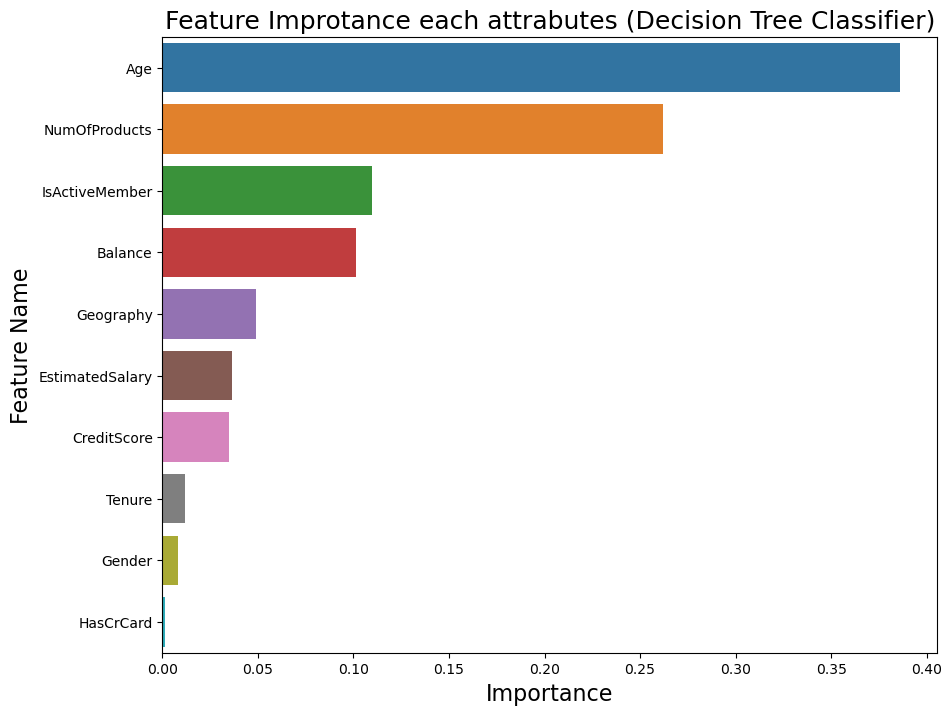

In [76]:
imp_df=pd.DataFrame({
    'Feature Name':x_train.columns,
    'Importance':dtree.feature_importances_
})
fi=imp_df.sort_values(by='Importance',ascending=False)
fi2=fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2,x='Importance',y='Feature Name')
plt.title('Feature Improtance each attrabutes (Decision Tree Classifier)',fontsize=18)
plt.xlabel('Importance',fontsize=16)
plt.ylabel('Feature Name',fontsize=16)

plt.show()

In [43]:
pip install shap

In [89]:
from sklearn.neighbors import KNeighborsClassifier
testing_score=[]
training_score=[]

knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

training_score.append(knn.score(x_train,y_train))
testing_score.append(knn.score(x_test,y_test))

from sklearn.metrics import accuracy_score
print(round(accuracy_score(y_test,y_pred)*100,2),"%")

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.


86.15 %


Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.


In [46]:
training_score

[0.816]

In [47]:
testing_score

[0.7645]

In [86]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(random_state=7,n_estimators=50,learning_rate=1)
ada.fit(x_train,y_train)
y_pred=ada.predict(x_test)

In [87]:
import math
y_pred=ada.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [88]:
from sklearn.metrics import accuracy_score
print(round(accuracy_score(y_test,y_pred)*100,2),"%")

86.15 %


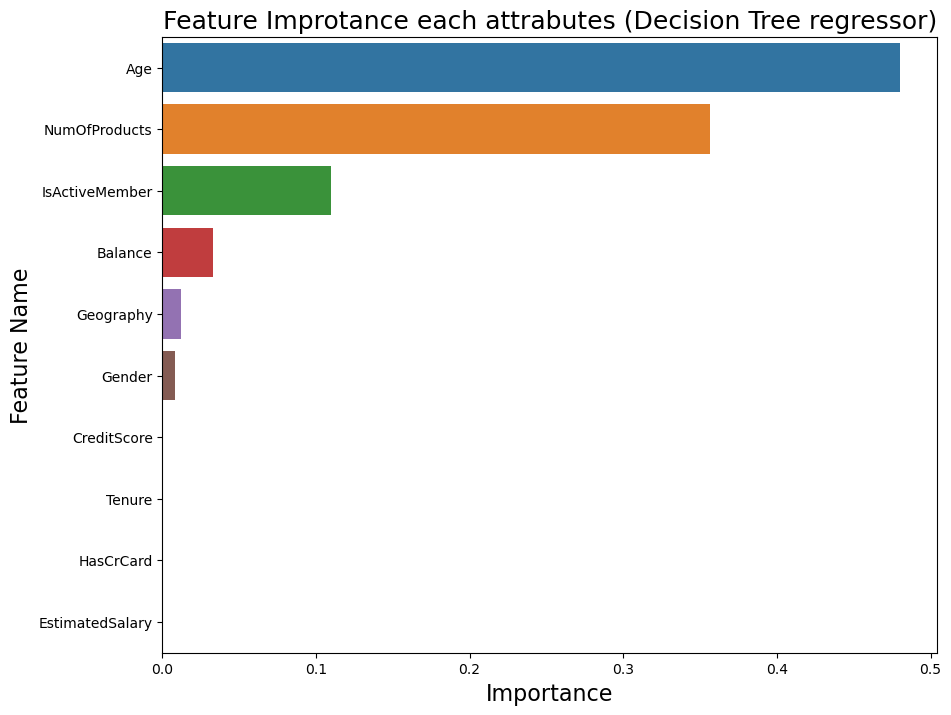

In [79]:
imp_df=pd.DataFrame({    
    'Feature Name':x_train.columns,
    'Importance':ada.feature_importances_
})
fi=imp_df.sort_values(by='Importance',ascending=False)
fi2=fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2,x='Importance',y='Feature Name')
plt.title('Feature Improtance each attrabutes (Decision Tree regressor)',fontsize=18)
plt.xlabel('Importance',fontsize=16)
plt.ylabel('Feature Name',fontsize=16)

plt.show()

In [91]:
from sklearn.svm import SVC

Classifier=SVC(kernel='linear',random_state=0)

Classifier.fit(x_train, y_train)

import math
y_pred=Classifier.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [92]:
from sklearn.metrics import accuracy_score
print(round(accuracy_score(y_test,y_pred)*100,2),"%")

78.05 %
